In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import math

In [ ]:
file_path = "/Users/zhangtianlu/Desktop/dep sym/mldata.csv"
df = pd.read_csv(file_path)
#print(data.head())
df.head()

,family_id,w1profile,w2profile,w3profile,t1mpla,t1smitm,t1smits,t1snmemo,t1spmemo,t1mlb,...,m1trcs,m1tprs,m1rrvs,m1tsoc,m1mexid,t1age_cr,t2age_cr,t3age_cr,t1born,m1educ
0,75,0.0,0.0,0.0,2.000000,2.272727,2.000000,2.25,2.666667,3.000000,...,5.0,3.666667,2.000000,2.666667,3.875000,12.019178,12.986301,17.830137,1,8.0
1,101,2.0,0.0,0.0,2.000000,3.090909,1.555556,3.25,2.000000,3.000000,...,4.0,2.333333,1.000000,3.666667,3.666667,12.745205,13.435616,17.213699,1,5.0
2,116,0.0,0.0,0.0,1.400000,3.818182,1.800000,1.00,3.000000,4.333333,...,2.0,3.666667,2.666667,3.333333,4.000000,13.115068,13.824658,18.523288,1,2.0
3,129,0.0,0.0,NaN,1.400000,2.545455,1.166667,1.75,2.666667,3.333333,...,4.0,4.333333,2.000000,2.666667,3.333333,11.780822,12.772603,NaN,1,4.0
4,148,0.0,0.0,NaN,1.857143,5.090909,1.545455,2.75,3.000000,4.000000,...,2.5,2.666667,1.333333,2.666667,3.777778,13.260274,14.161644,NaN,1,6.0


In [ ]:
#select samples with wave1 profile data
df1 = df.dropna(subset=['w1profile'])
#make sure the sample size is correct
num_samples_1 = df1.shape[0]
print("Number of samples:", num_samples_1)
df1.head()

#select samples with wave1 profile data
df3 = df.dropna(subset=['w3profile'])
#make sure the sample size is correct
num_samples_3 = df3.shape[0]
print("Number of samples:", num_samples_3)
df3.head()

Number of samples: 595
Number of samples: 328


,family_id,w1profile,w2profile,w3profile,t1mpla,t1smitm,t1smits,t1snmemo,t1spmemo,t1mlb,...,m1trcs,m1tprs,m1rrvs,m1tsoc,m1mexid,t1age_cr,t2age_cr,t3age_cr,t1born,m1educ
0,75,0.0,0.0,0.0,2.0,2.272727,2.000000,2.25,2.666667,3.000000,...,5.0,3.666667,2.000000,2.666667,3.875000,12.019178,12.986301,17.830137,1,8.0
1,101,2.0,0.0,0.0,2.0,3.090909,1.555556,3.25,2.000000,3.000000,...,4.0,2.333333,1.000000,3.666667,3.666667,12.745205,13.435616,17.213699,1,5.0
2,116,0.0,0.0,0.0,1.4,3.818182,1.800000,1.00,3.000000,4.333333,...,2.0,3.666667,2.666667,3.333333,4.000000,13.115068,13.824658,18.523288,1,2.0
6,151,0.0,0.0,0.0,1.0,5.545455,1.000000,1.00,6.333333,5.000000,...,5.0,5.000000,1.666667,3.666667,4.444444,11.495890,12.493151,17.210959,2,8.0
8,158,0.0,0.0,0.0,1.0,3.363636,1.142857,1.75,5.000000,3.333333,...,4.5,3.666667,2.333333,4.666667,4.000000,11.315068,14.169863,18.260274,1,8.0


In [ ]:
# use the method in the next column_replace the missing data using mean instead of dropping them
#df1_new = df1.dropna()
#num_samples_1 = df1_new.shape[0]
#print("Number of samples:", num_samples_1)

#df3_new = df3.dropna()
#num_samples_3 = df3_new.shape[0]
#print("Number of samples:", num_samples_3)

Number of samples: 278
Number of samples: 278


In [ ]:
from sklearn.impute import SimpleImputer

x1 = df1.iloc[:, 4:65]  # Selecting columns 4 to 35
y1 = df1['w1profile'].values

x3 = df3.iloc[:, 4:65]  # Selecting columns 4 to 35
y3 = df3['w3profile'].values

# replace the missing data using mean instead of dropping them
# Impute missing values using the mean of each feature
imputer = SimpleImputer(strategy='mean')
x1 = imputer.fit_transform(x1)
x3 = imputer.fit_transform(x3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import plot_importance
from sklearn.utils.class_weight import compute_class_weight


import xgboost as xgb

In [ ]:
# Split the data into training and test sets
x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y1, test_size=0.2, random_state=42)
x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y3, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_val = scaler.transform(x1_val)

x3_train = scaler.fit_transform(x3_train)
x3_val = scaler.transform(x3_val)


# Compute class weights
class_weights1 = compute_class_weight('balanced', classes=np.unique(y1_train), y=y1_train)
weights_dict1 = {0: class_weights1[0], 1: class_weights1[1], 2: class_weights1[2]}
class_weights3 = compute_class_weight('balanced', classes=np.unique(y3_train), y=y3_train)
weights_dict3 = {0: class_weights3[0], 1: class_weights3[1], 2: class_weights3[2]}

In [ ]:
np.random.seed(42)
data = {
    'Language_brokering': np.random.rand(100),
    'Acculturation_enculturation': np.random.rand(100),
    'Discrimination': np.random.rand(100),
    'Familism': np.random.rand(100),
    'Traditional_gender_belief': np.random.rand(100),
    'Socialization': np.random.rand(100),
    'Bicultural_management_difficulty': np.random.rand(100),
    'Foreigner_stress': np.random.rand(100),
    'Ethnic_identity': np.random.rand(100),
    'Depressive_symptoms': np.random.randint(0, 2, 100)  # binary classification as example
}

df = pd.DataFrame(data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define neural network model for y1
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(x1_train.shape[1],)),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(3, activation='softmax')  # Output layer for 3 categories
])

# Define neural network model for y3
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(x3_train.shape[1],)),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(3, activation='softmax')  # Output layer for 3 categories
])

# Compile models
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models with early stopping and class weights
history1 = model1.fit(x1_train, y1_train, epochs=50, validation_data=(x1_val, y1_val), callbacks=[early_stopping], class_weight=weights_dict1)
history3 = model3.fit(x3_train, y3_train, epochs=50, validation_data=(x3_val, y3_val), callbacks=[early_stopping], class_weight=weights_dict3)

Epoch 1/50
15/15 [==============================] - 1s 18ms/step - loss: 1.1760 - accuracy: 0.5378 - val_loss: 1.1448 - val_accuracy: 0.3277
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.9390 - accuracy: 0.4496 - val_loss: 1.0858 - val_accuracy: 0.4286
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.8057 - accuracy: 0.5693 - val_loss: 0.9880 - val_accuracy: 0.5042
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.7388 - accuracy: 0.5966 - val_loss: 1.0223 - val_accuracy: 0.4454
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.6660 - val_loss: 0.9499 - val_accuracy: 0.5210
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.6954 - val_loss: 0.9301 - val_accuracy: 0.5630
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5487 - accuracy: 0.7101 - val_loss: 0.9506 - val_accuracy: 0.5462
Epoch 8/50
15/15 [=

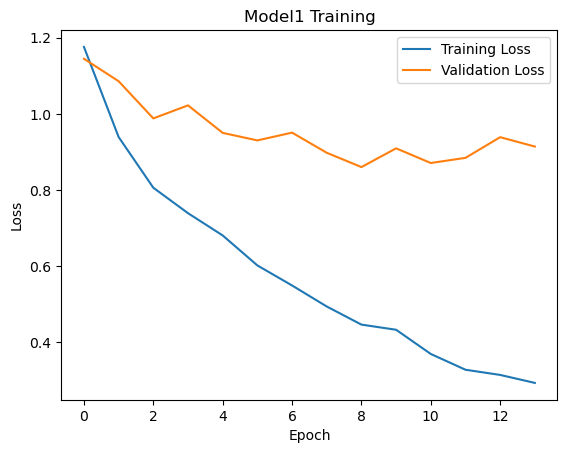

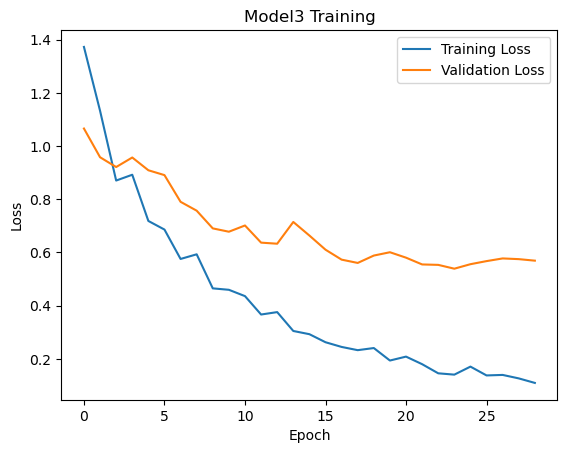

3/3 [==============================] - 0s 3ms/step
Model1 Validation Accuracy: 0.6134453781512605
Model3 Validation Accuracy: 0.8636363636363636


In [ ]:
# Visualize training
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model1 Training')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model3 Training')
plt.legend()
plt.show()

# Evaluate models
y1_pred = model1.predict(x1_val)
y1_pred_classes = np.argmax(y1_pred, axis=1)
accuracy1 = accuracy_score(y1_val, y1_pred_classes)

y3_pred = model3.predict(x3_val)
y3_pred_classes = np.argmax(y3_pred, axis=1)
accuracy3 = accuracy_score(y3_val, y3_pred_classes)

print(f'Model1 Validation Accuracy: {accuracy1}')
print(f'Model3 Validation Accuracy: {accuracy3}')

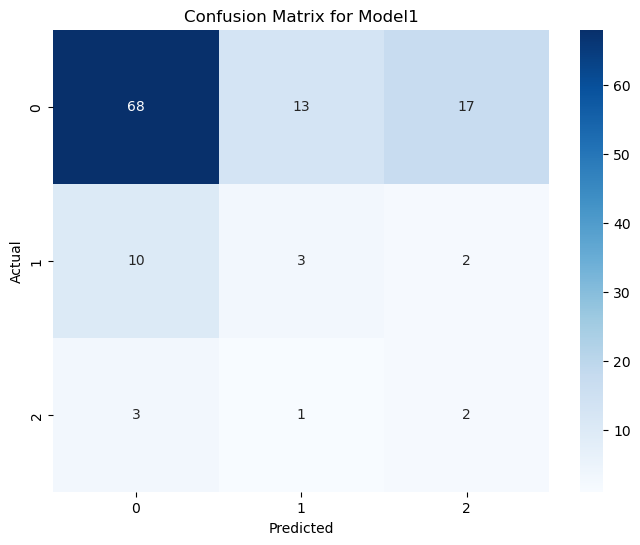

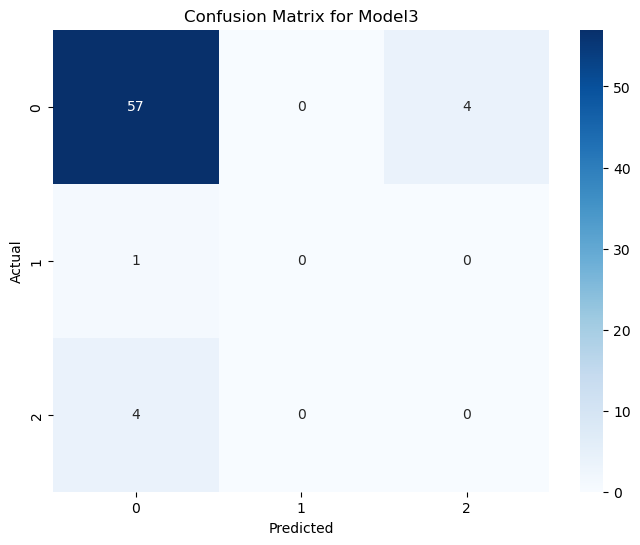

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for model1
conf_matrix1 = confusion_matrix(y1_val, y1_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model1')
plt.show()


# Calculate confusion matrix for model3
conf_matrix3 = confusion_matrix(y3_val, y3_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model3')
plt.show()